<a href="https://colab.research.google.com/github/Yashwanth251103/Mlops/blob/main/Mhealth_human_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/mhealth_human_activity_data/mhealth_resampled_data.csv')
df

alx      aly      alz      glx      gly      glz      arx  \
0       -0.68636  -5.2902  4.64530  0.13544 -0.83114 -0.13163  -8.4230   
1        1.00030  -7.7902 -6.74410 -0.26531 -0.14447 -1.09820   2.2046   
2        1.53220  -9.5966 -0.25618 -0.27273 -0.75985  0.63654  -2.5898   
3        1.78090  -8.5942 -3.97440 -0.41002 -0.55535 -0.78389  -1.0049   
4       -0.34940  -9.5201  1.45800 -0.68275 -0.77861 -0.24558  -1.4178   
...          ...      ...      ...      ...      ...      ...      ...   
373190  -2.48730 -19.2330  3.46140  0.61967 -0.33771 -0.82711  -8.2348   
373191 -21.59100 -19.4370 -6.04190  0.61967 -0.33771 -0.82711 -21.3180   
373192   7.54330 -19.2450 -2.66800  0.61967 -0.33771 -0.82711 -21.2970   
373193   3.01420 -19.3340 -7.70740  0.71058 -0.27017 -0.75442 -21.1380   
373194  -2.36980 -19.3000 -4.23870  0.71058 -0.27017 -0.75442 -21.1730   

            ary      arz      grx       gry       grz  Activity    subject  
0       -6.6402  2.98050 -0.93922  0.090349  0.219830         0   subject1  
1       -7.5497  4.02880 -0.21961 -1.080100  0.303880         0   subject8  
2       -8.5217  3.83430 -0.88431 -0.848050  0.331900         0   subject2  
3       -6.8588  2.11540 -0.35686 -0.854210 -0.415950         0   subject4  
4       -9.5157  1.43050 -0.12353 -0.967150 -0.497840         0   subject3  
...         ...      ...      ...       ...       ...       ...        ...  
373190  -4.9652  2.48090 -0.43725 -1.018500  0.079741        12  subject10  
373191 -10.2130  3.65600 -0.43725 -1.018500  0.079741        12  subject10  
373192 -18.7050  4.46060 -0.43725 -1.018500  0.079741        12  subject10  
373193 -18.6980  1.15880 -0.42549 -1.037000  0.084052        12  subject10  
373194 -14.2910 -0.13123 -0.42549 -1.037000  0.084052        12  subject10  

[373195 rows x 14 columns]

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373195 entries, 0 to 373194
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alx       373195 non-null  float64
 1   aly       373195 non-null  float64
 2   alz       373195 non-null  float64
 3   glx       373195 non-null  float64
 4   gly       373195 non-null  float64
 5   glz       373195 non-null  float64
 6   arx       373195 non-null  float64
 7   ary       373195 non-null  float64
 8   arz       373195 non-null  float64
 9   grx       373195 non-null  float64
 10  gry       373195 non-null  float64
 11  grz       373195 non-null  float64
 12  Activity  373195 non-null  int64  
 13  subject   373195 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 39.9+ MB


In [ ]:
df.isnull().sum()


alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [ ]:
df = df.drop(df[df.duplicated(keep = 'first')].index, axis=0)


In [ ]:
df.Activity.value_counts()


Activity
1     30720
2     30720
3     30720
4     30720
9     30720
10    30720
11    30720
5     30720
0     29540
7     29441
8     29337
6     28315
12    10342
Name: count, dtype: int64

In [ ]:

label_map = {
    0: 'Nothing',
    1: 'Standing still',
    2: 'Sitting and relaxing',
    3: 'Lying down',
    4: 'Walking',
    5: 'Climbing stairs',
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms',
    8: 'Knees bending (crouching)',
    9: 'Cycling',
    10: 'Jogging',
    11: 'Running',
    12: 'Jump front & back'
}

In [ ]:
def plot_comparison(data, metric = 'acceleration'):

  metric = metric[0].lower()
  data = data

  for i in range(0,13):
    plt.figure(figsize=(16,4))

    plt.subplot(1,2,1)
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'lx'], alpha=.7, label=metric+'lx')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'ly'],color='red', alpha=.7, label=metric+'ly')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'lz'],color='green', alpha=.7, label=metric+'lz')
    plt.title(f'{label_map[i]} - left-ankle')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'rx'], alpha=.7, label=metric+'rx')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'ry'],color='red', alpha=.7, label=metric+'ry')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'rz'],color='green', alpha=.7, label=metric+'rz')
    plt.title(f'{label_map[i]} - right-lower-arm')
    plt.legend()

    plt.show()
    print()

def plot_category(data,cat):
  array = (data[cat].value_counts().sort_values(ascending=False)/len(data))*100
  plt.barh(array.index, width = array.values)
  for index, value in enumerate(array.values):
      plt.text(value + .5 , index, s= '{:.1f}%'.format(value))
  plt.show()

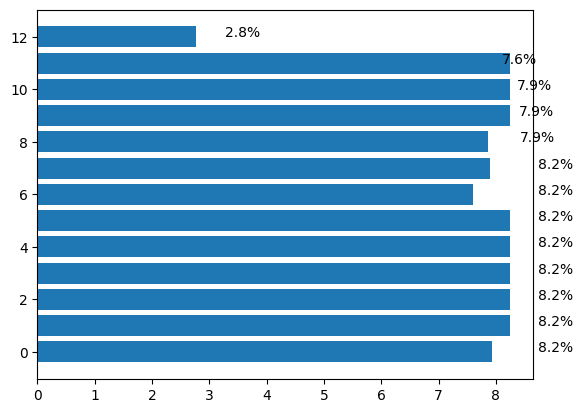

In [ ]:
plot_category(df,'Activity')


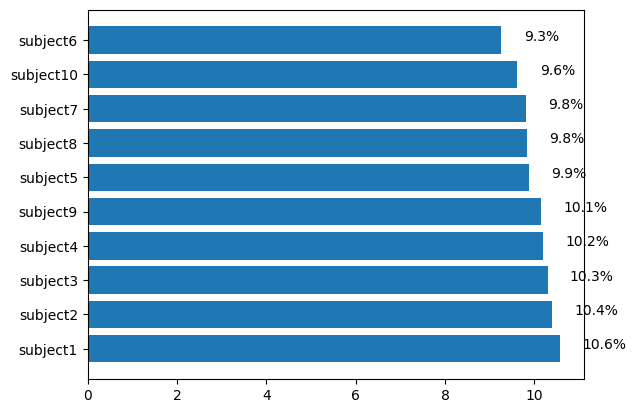

In [ ]:
plot_category(df,'subject')


#EDA of 1 subject data


In [ ]:
subject1 = df[df['subject']=='subject1']
subject1.Activity.value_counts()

Activity
0     4243
8     3379
1     3072
2     3072
3     3072
4     3072
6     3072
7     3072
9     3072
10    3072
11    3072
5     3072
12    1075
Name: count, dtype: int64

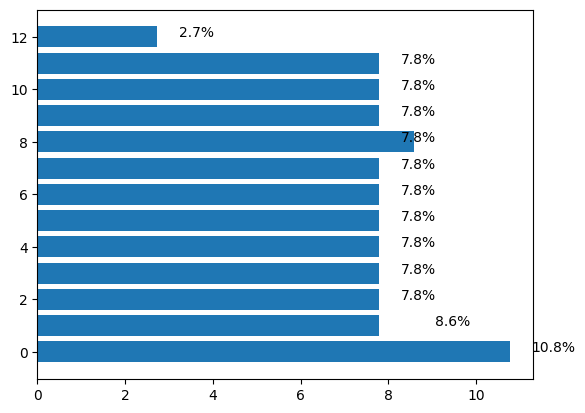

In [ ]:
plot_category(subject1,'Activity')

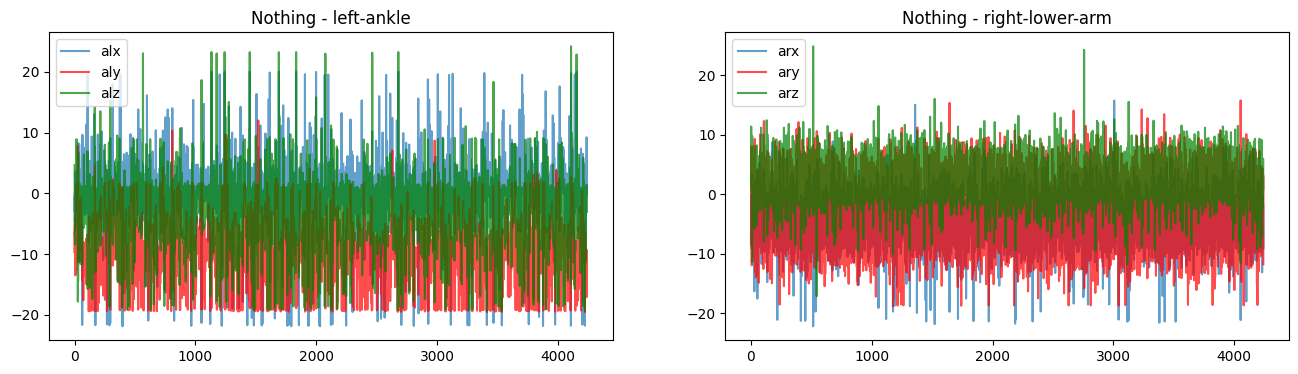

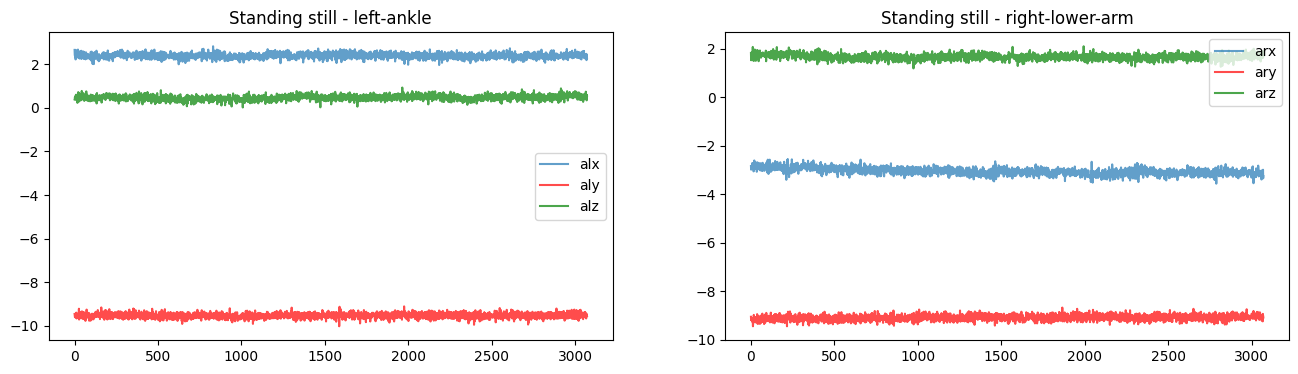

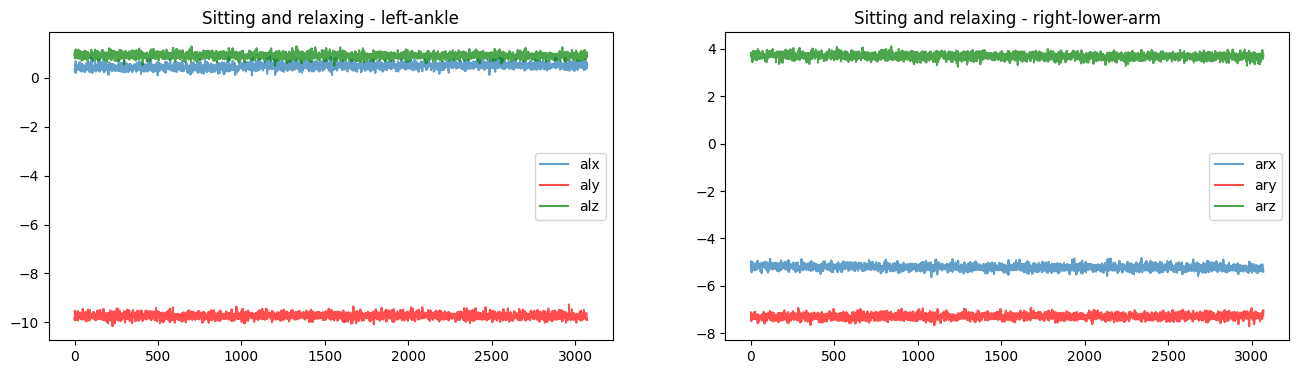

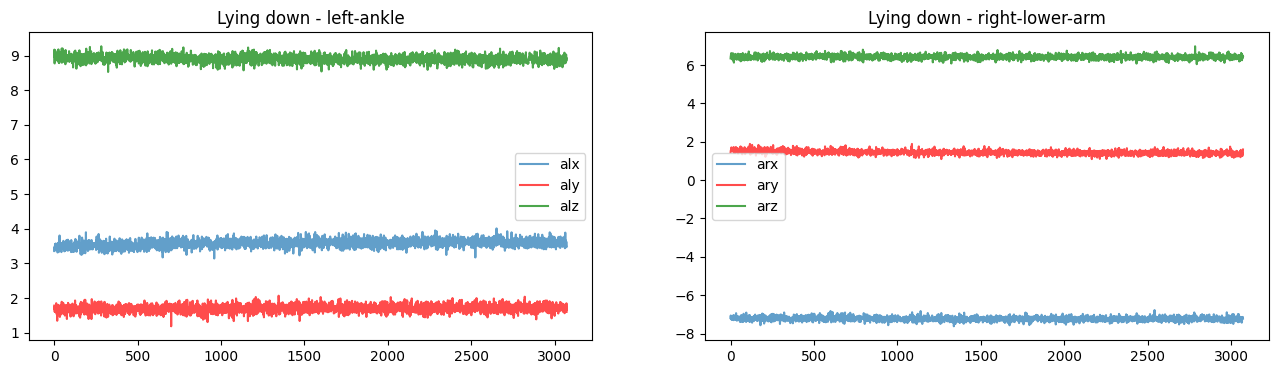

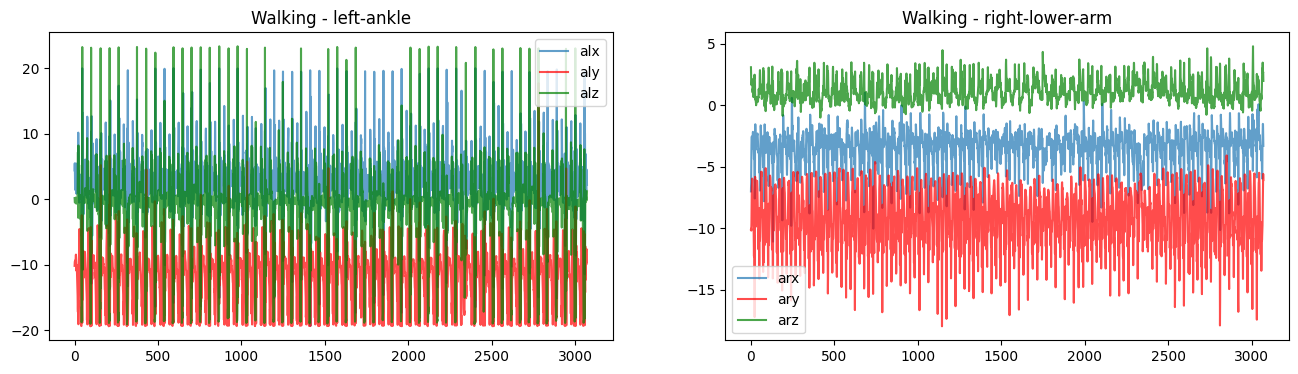

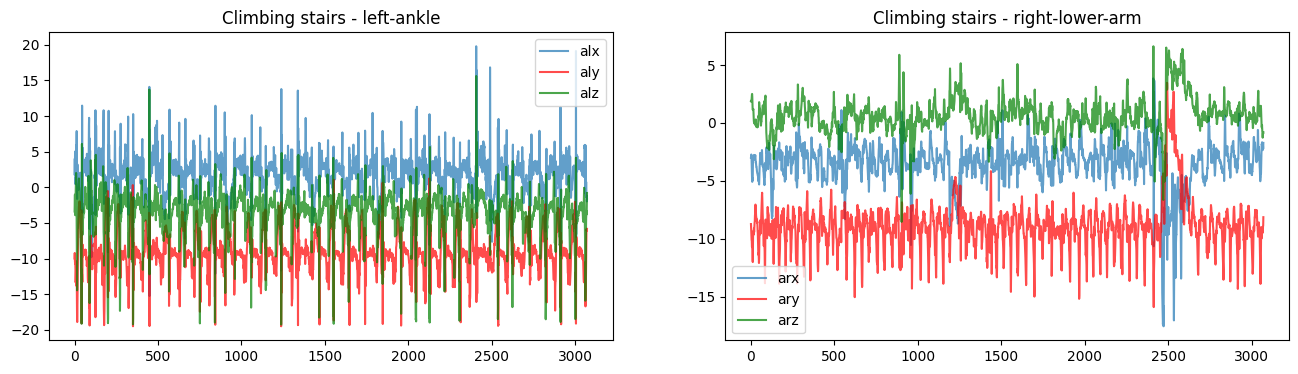

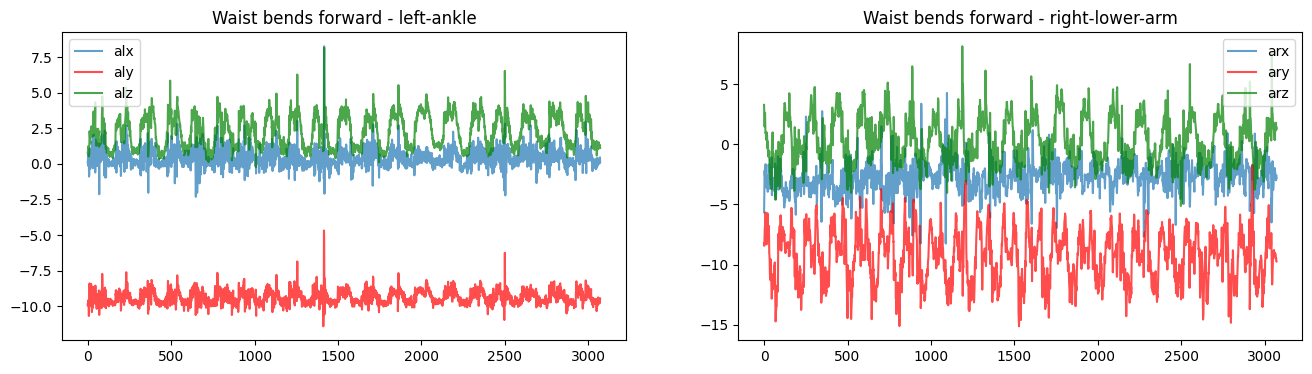

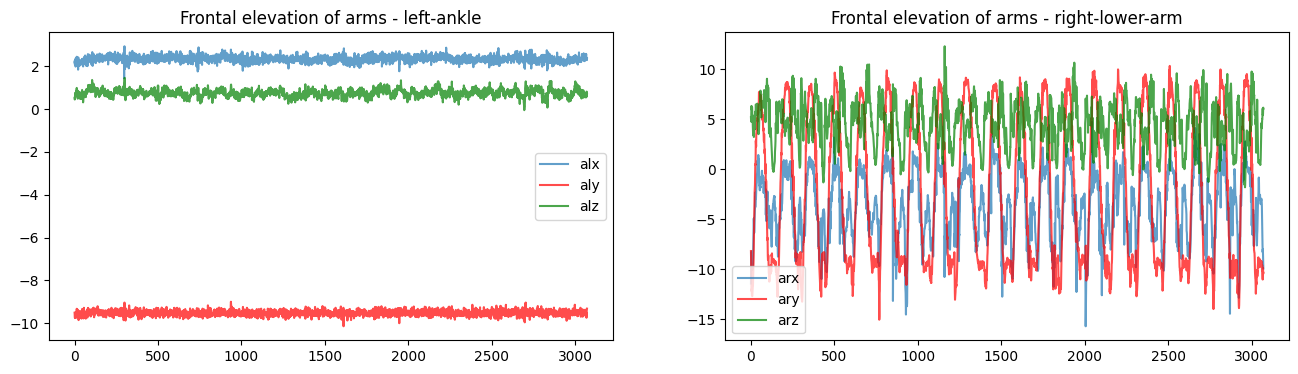

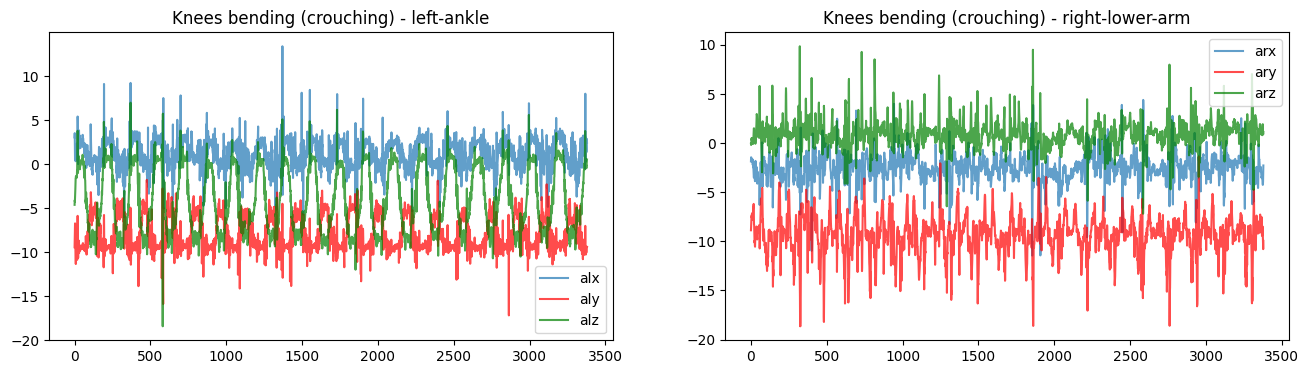

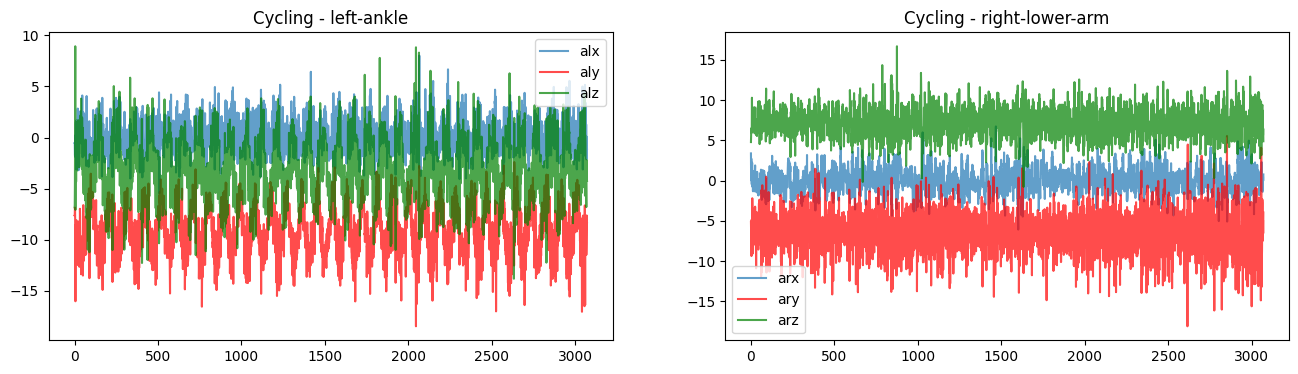

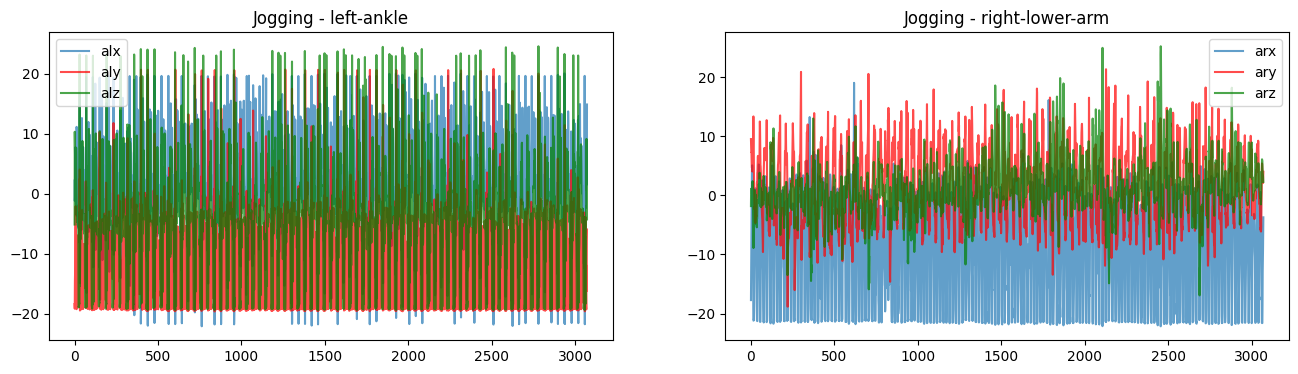

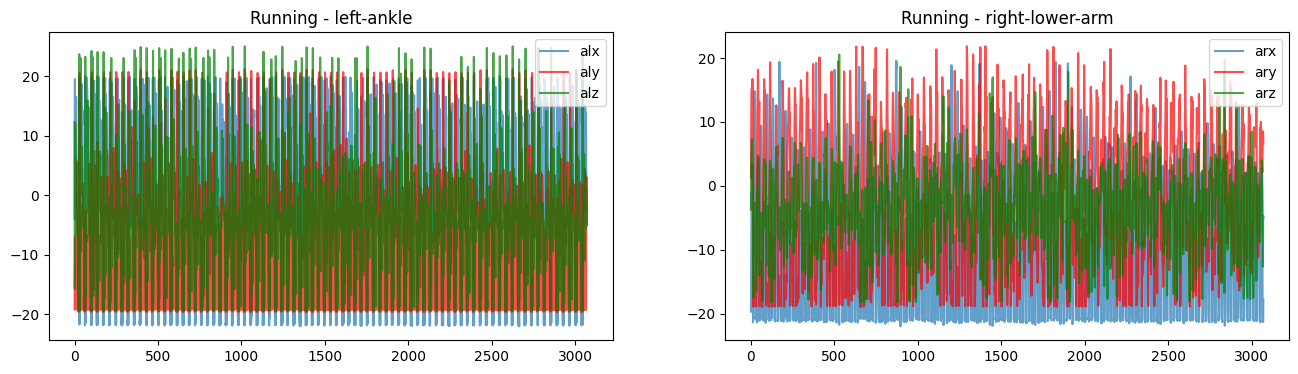

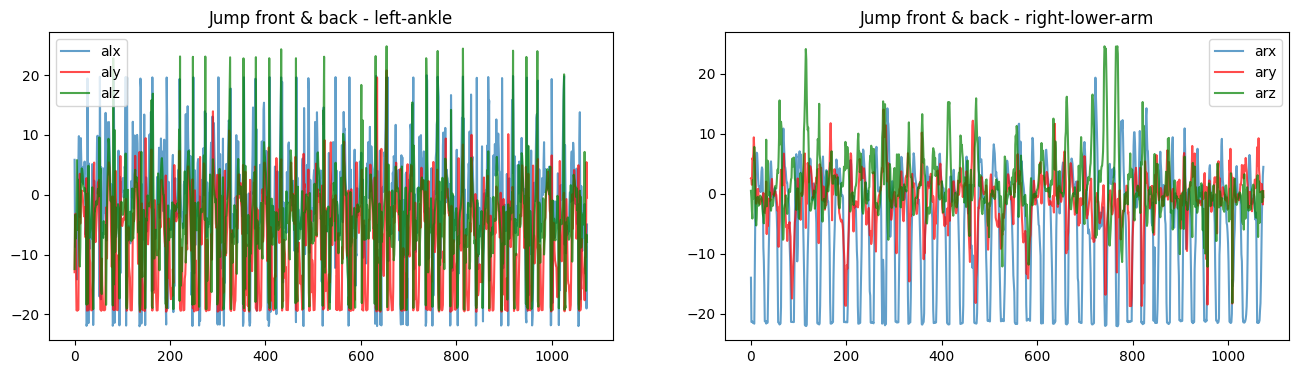

In [ ]:
plot_comparison(subject1,'acceleration')

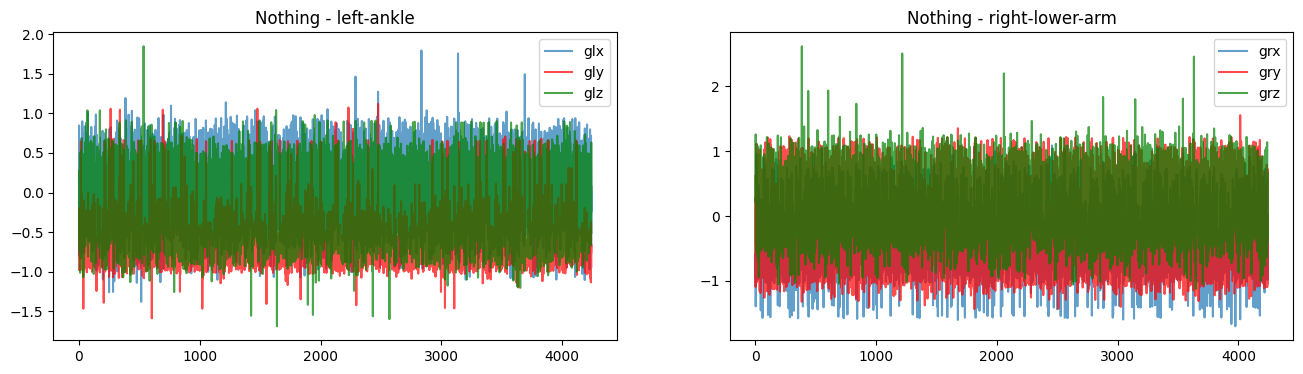

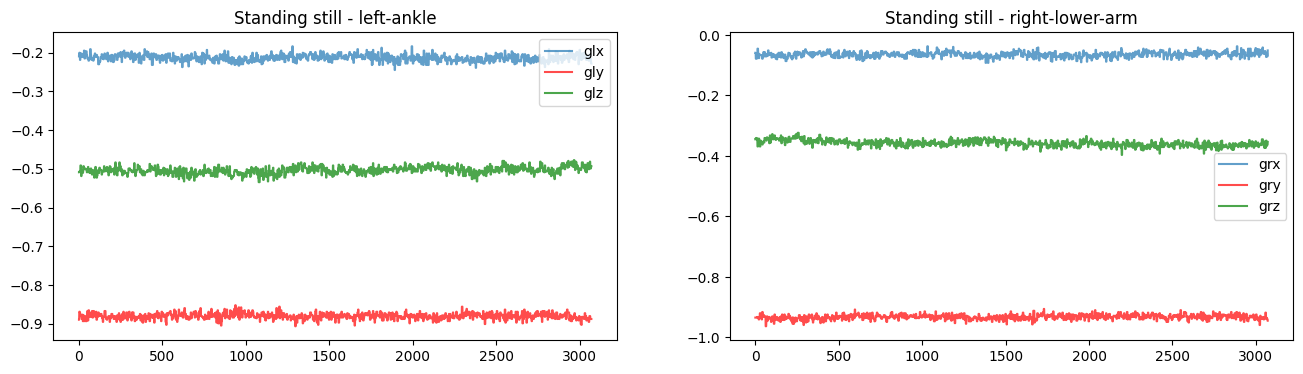

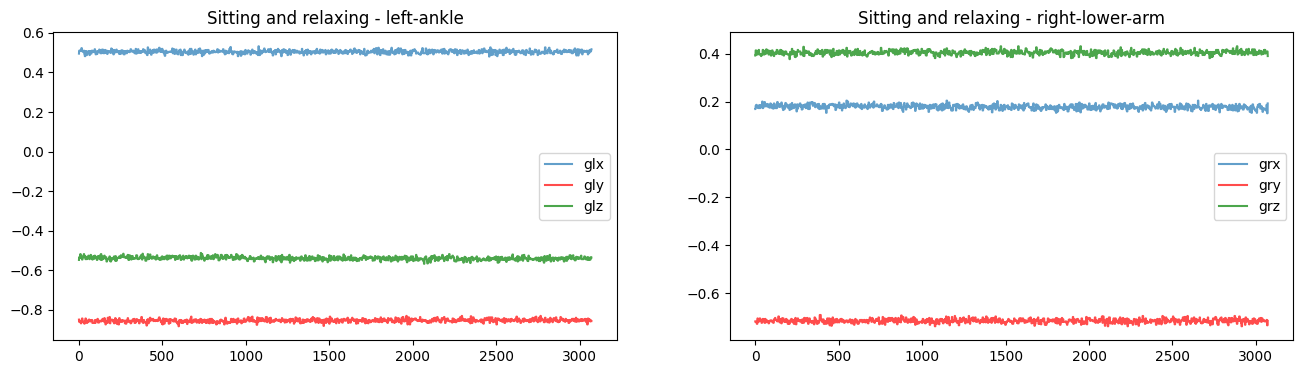

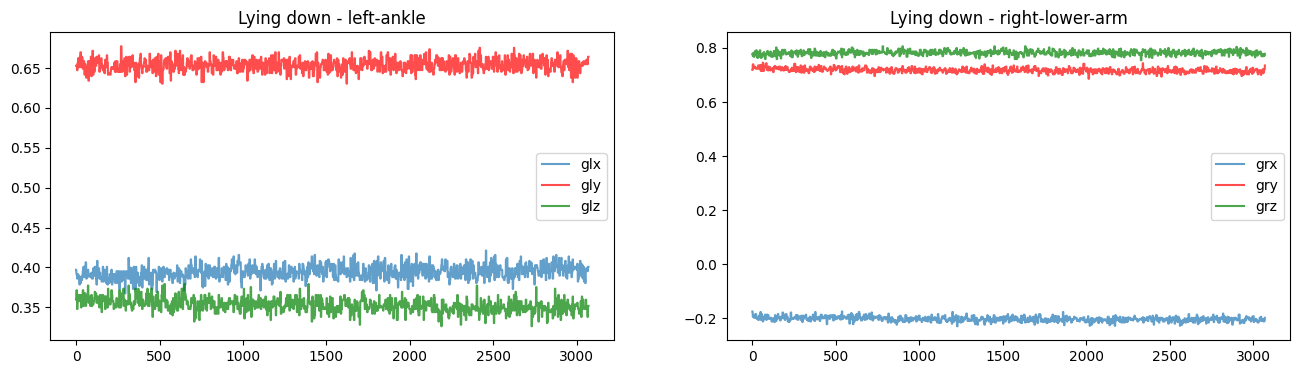

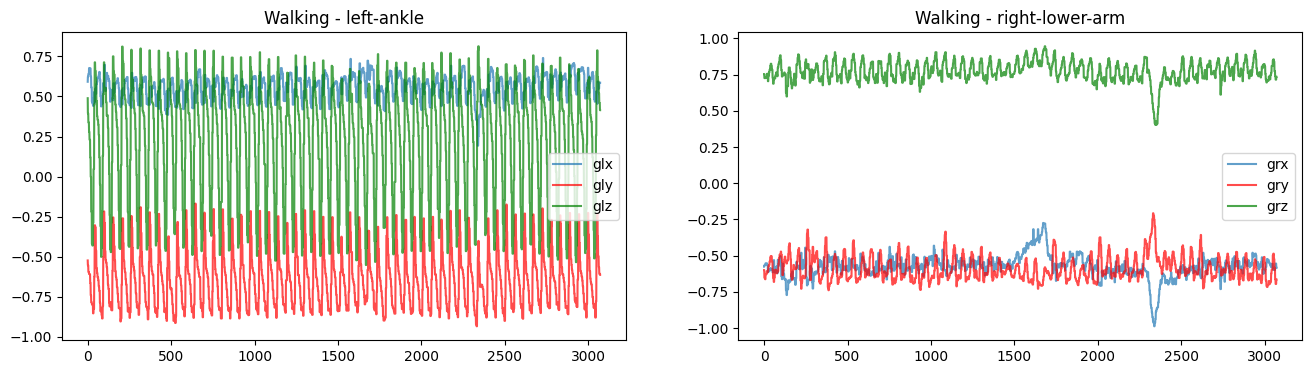

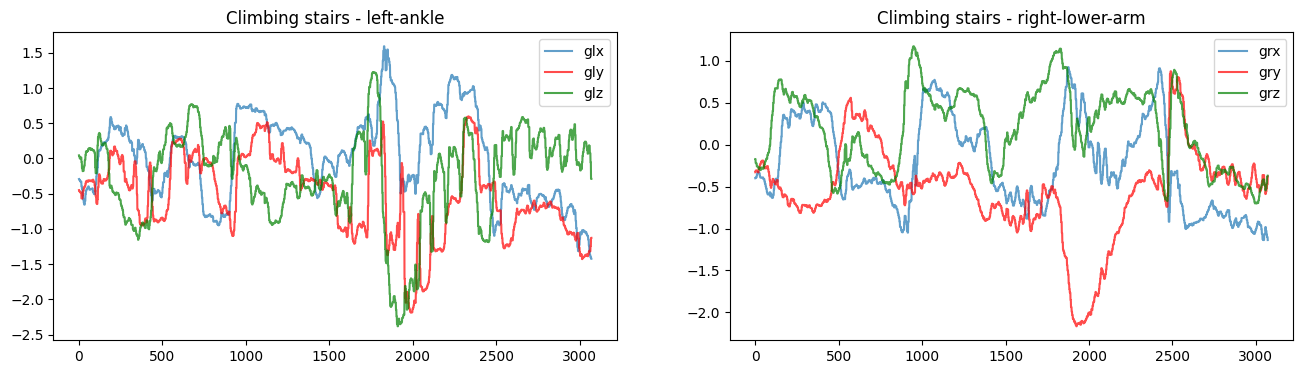

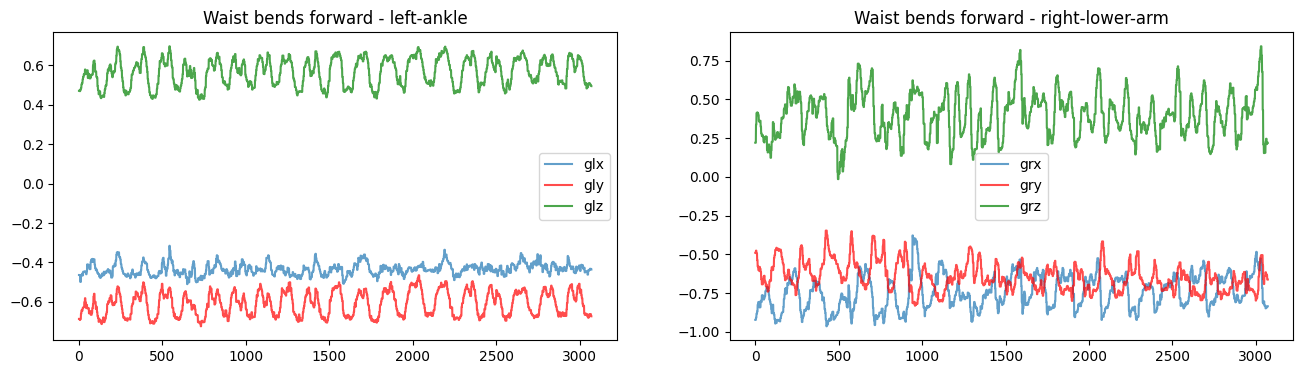

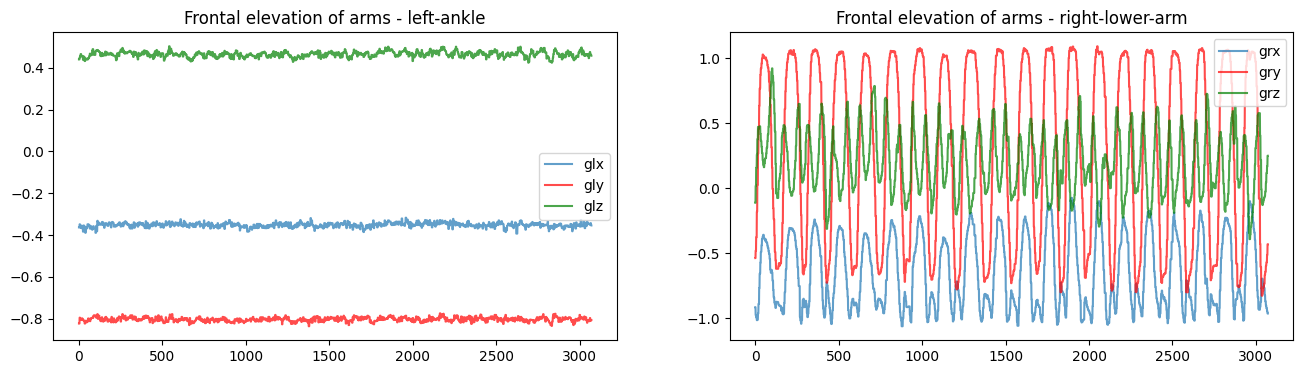

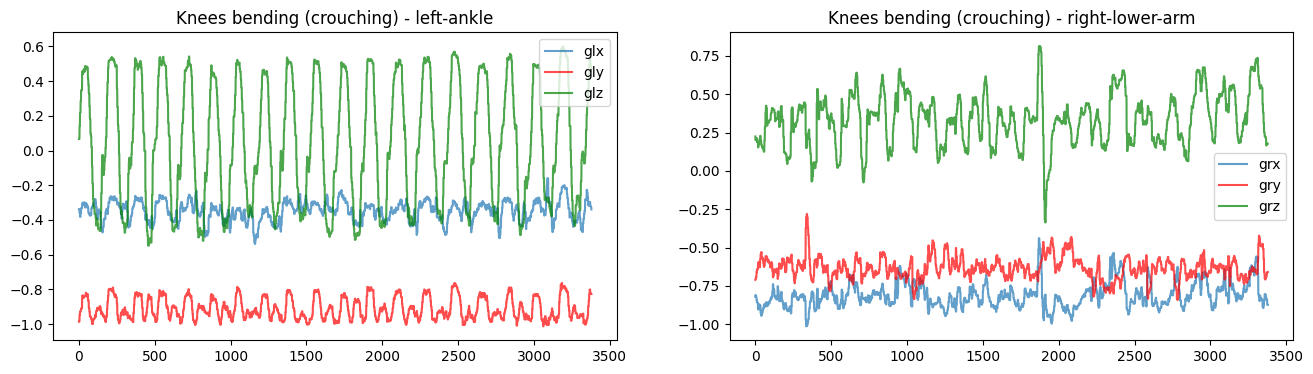

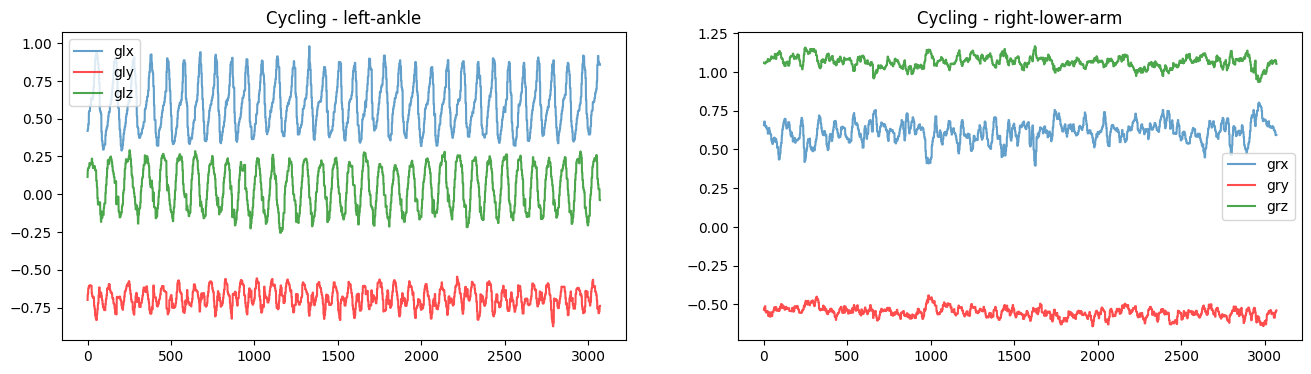

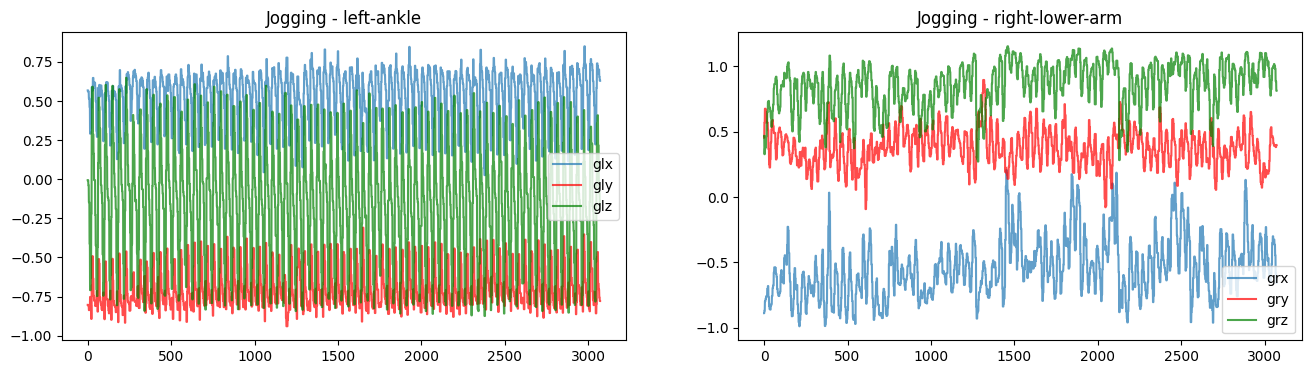

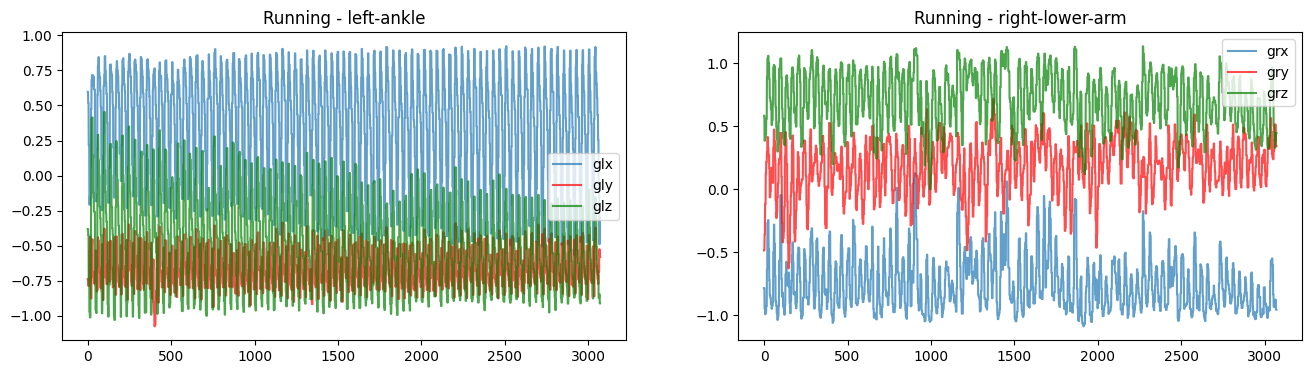

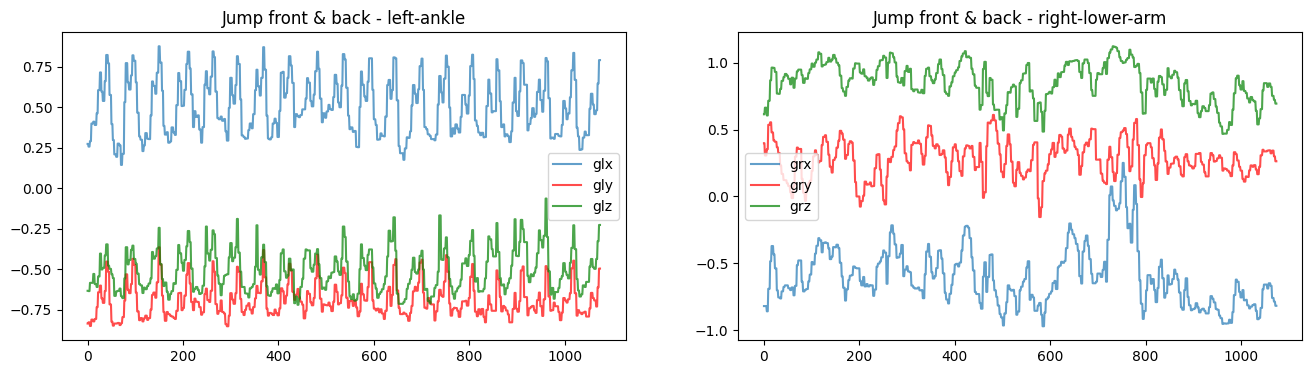

In [ ]:
plot_comparison(subject1,'gyroscope')

#EDA of Full Dataset


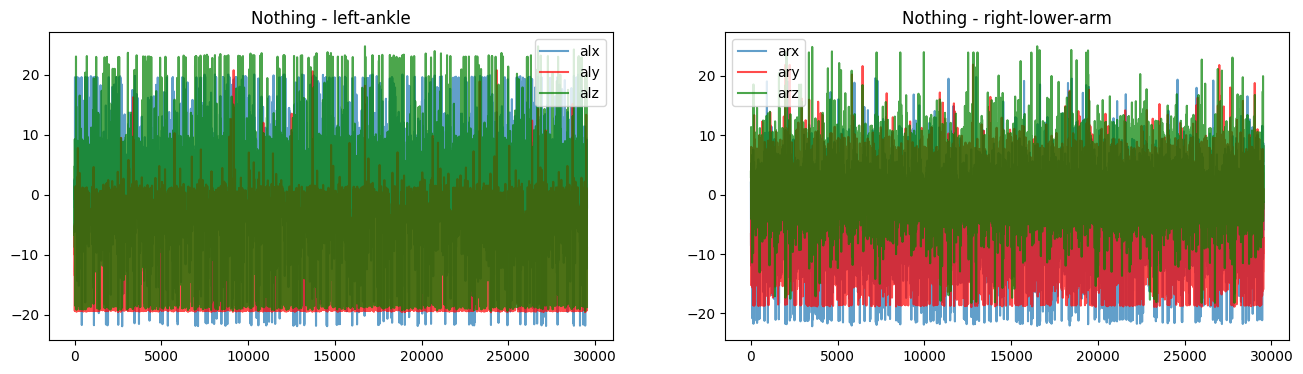

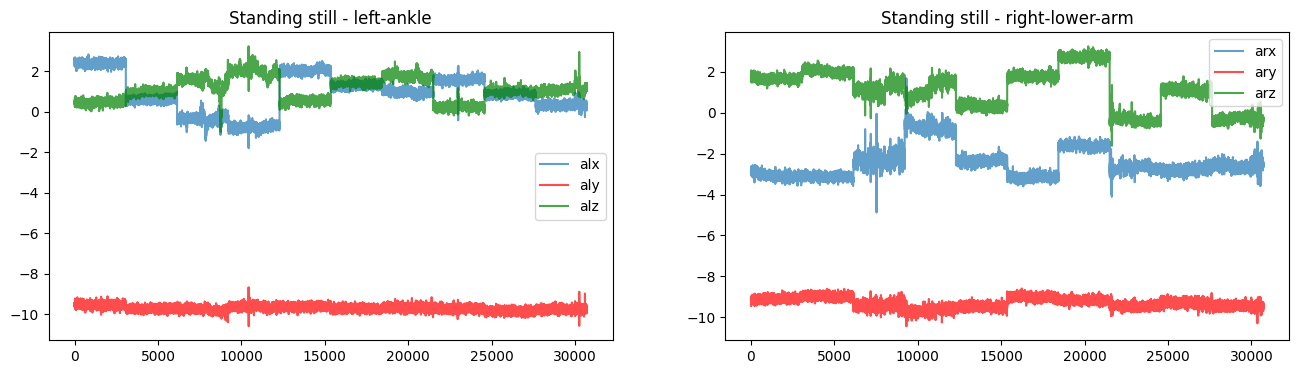

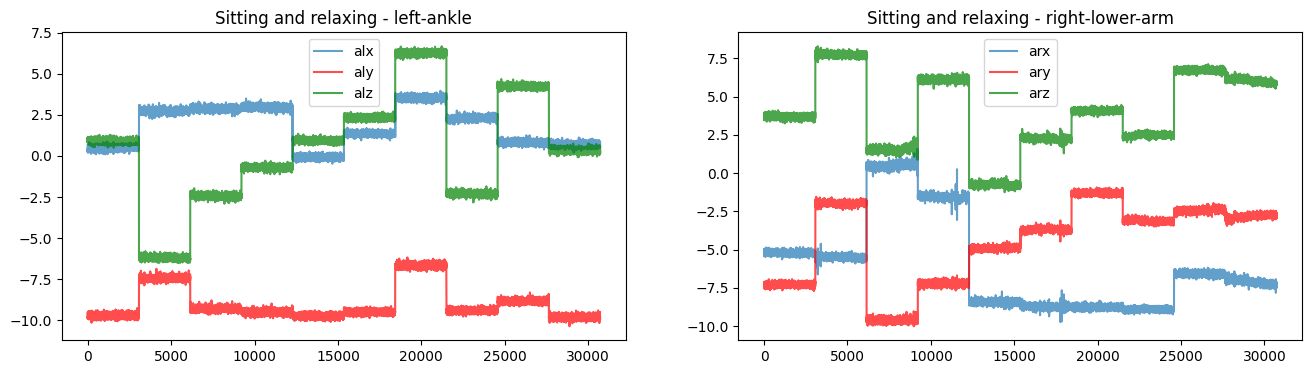

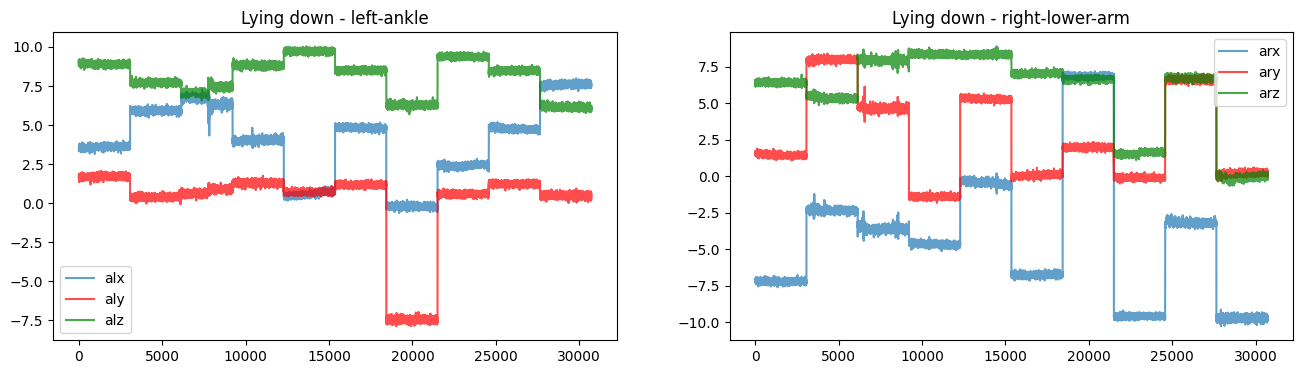

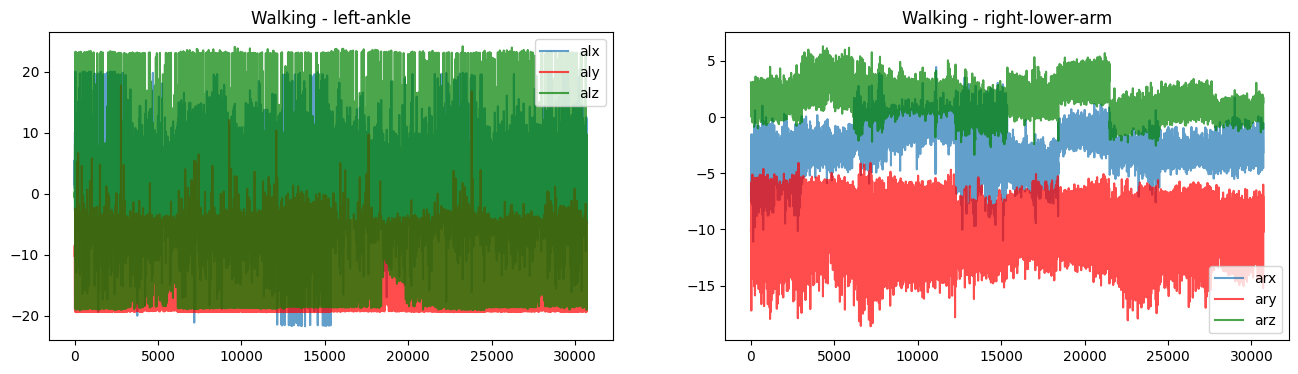

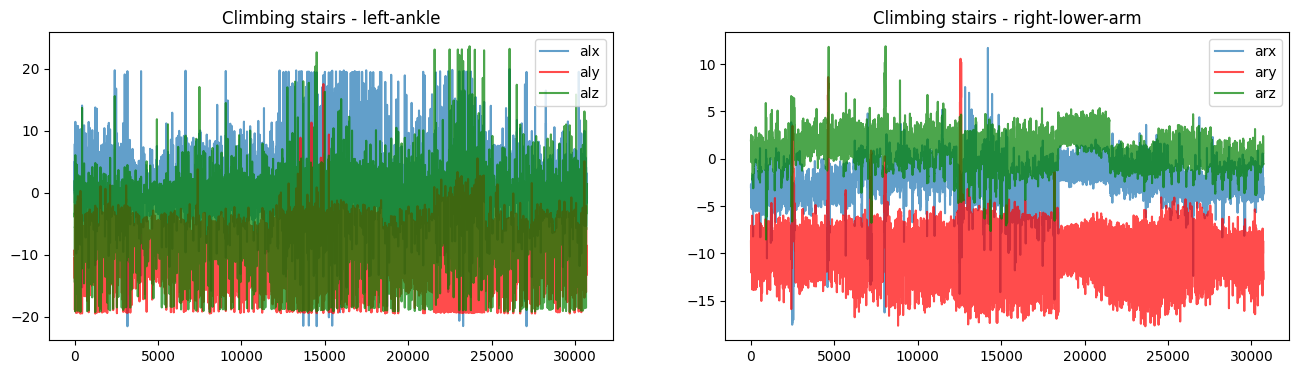

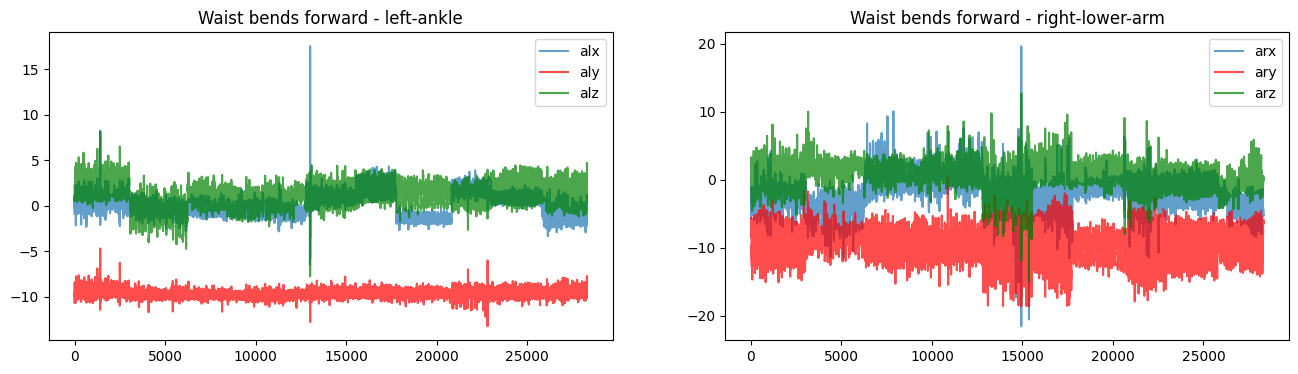

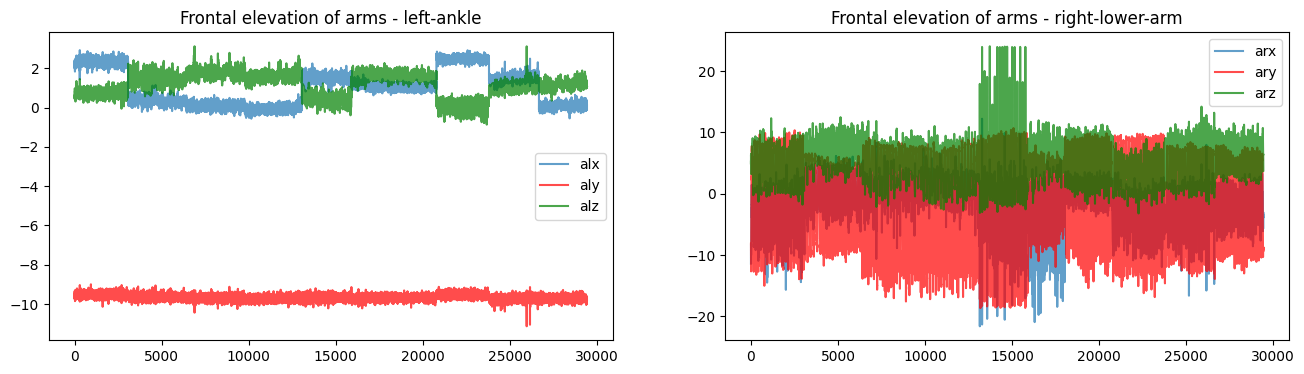

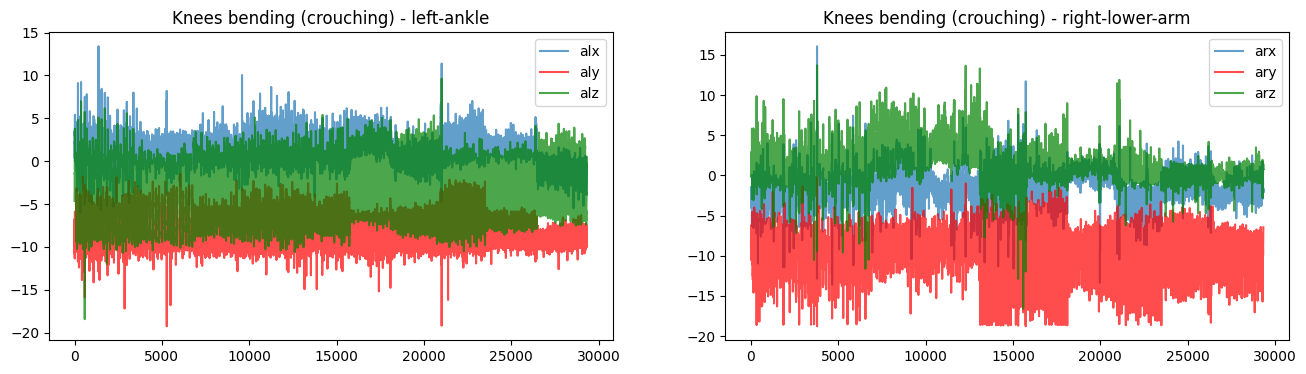

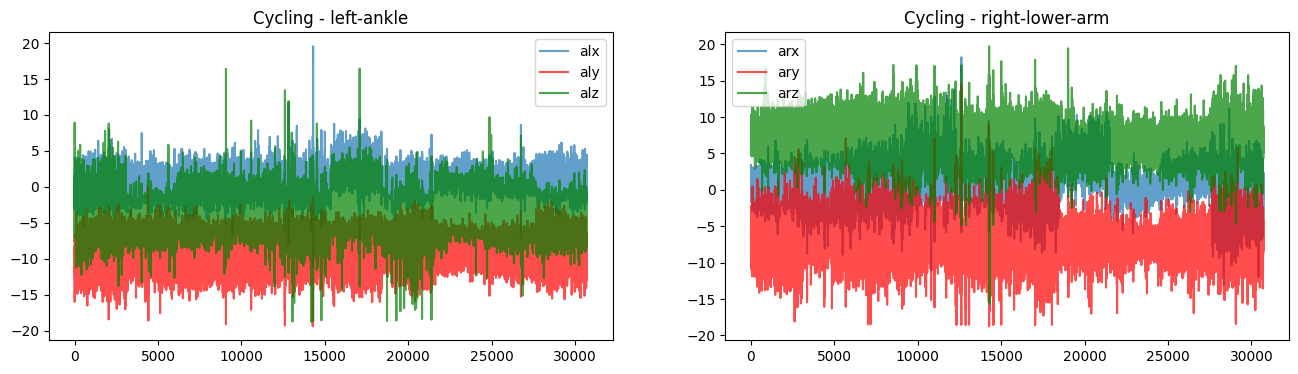

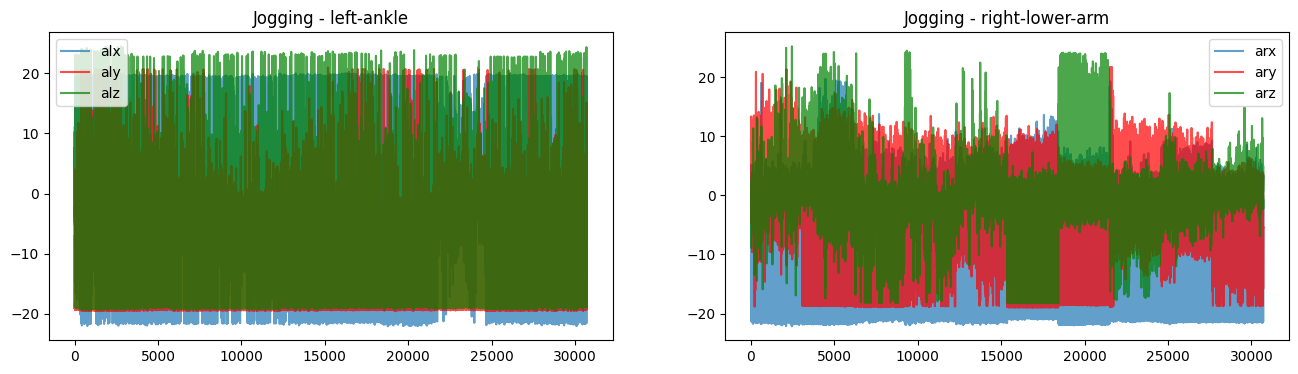

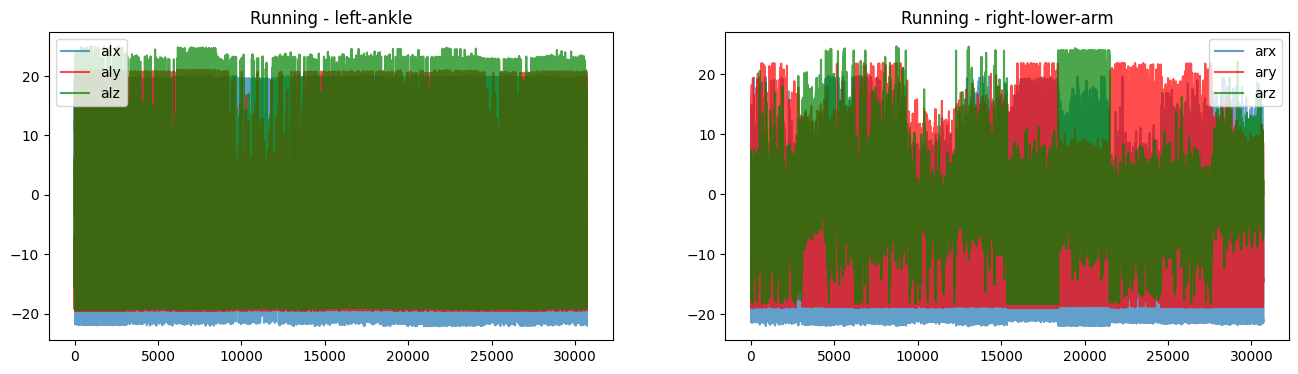

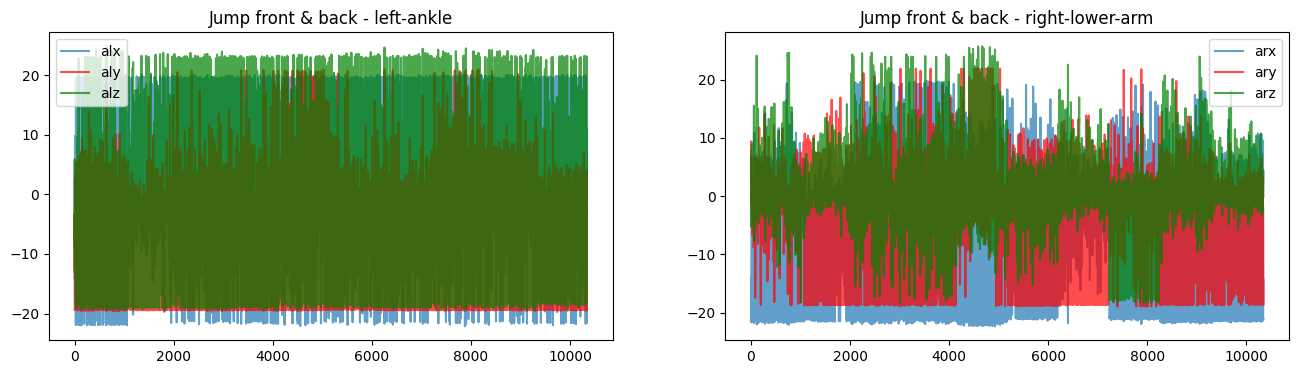

In [ ]:
plot_comparison(df)


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/pyt

<Figure size 800x600 with 0 Axes>

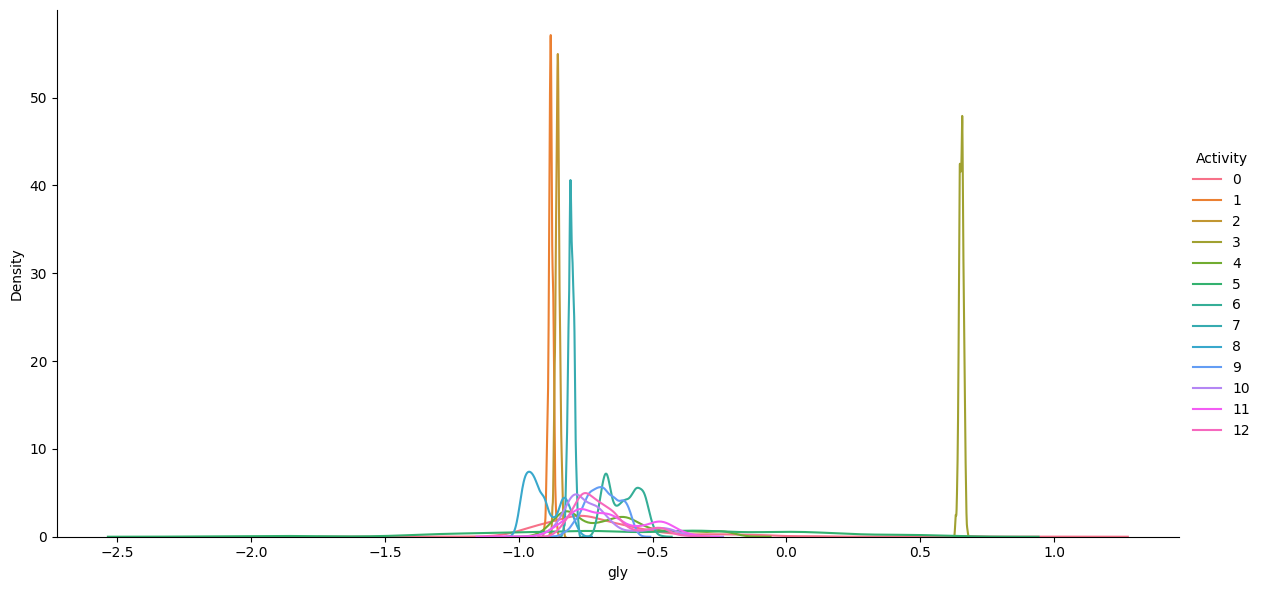

In [ ]:
plt.figure(figsize=(8,6))
facetgrid = sns.FacetGrid(subject1, hue='Activity', height=6, aspect=2)
facetgrid.map(sns.distplot,'gly', hist=False).add_legend()

plt.show()

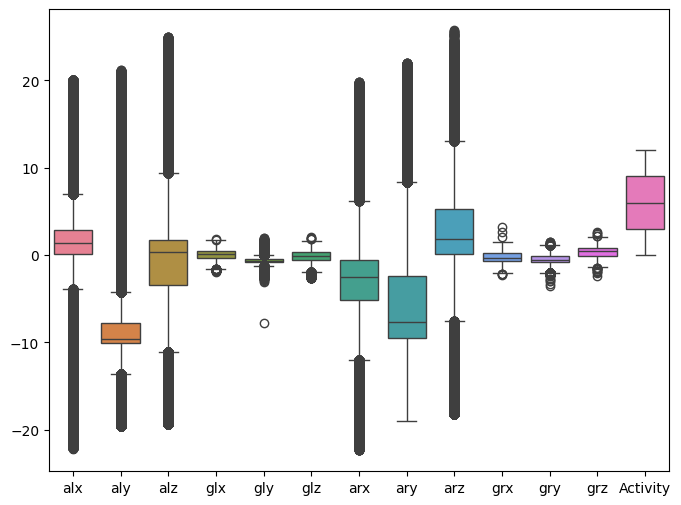

In [ ]:

plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.show()

#Data Cleaning

In [ ]:
df.describe().T


count      mean       std      min        25%      50%       75%  \
alx       372735.0  1.770455  4.171677 -22.1460   0.158815  1.36550  2.883200   
aly       372735.0 -9.128515  5.100531 -19.6190 -10.078000 -9.60640 -7.726200   
alz       372735.0 -0.726296  6.354113 -19.3730  -3.368250  0.29895  1.759600   
glx       372735.0  0.090230  0.463354  -1.8942  -0.354360  0.18367  0.484230   
gly       372735.0 -0.557152  0.427417  -7.7899  -0.810510 -0.69043 -0.493430   
glz       372735.0 -0.125316  0.554999  -2.6267  -0.571710 -0.11002  0.349710   
arx       372735.0 -3.478782  5.778589 -22.3450  -5.166500 -2.53390 -0.602910   
ary       372735.0 -5.783884  6.492916 -18.9720  -9.542600 -7.71190 -2.373100   
arz       372735.0  2.383707  4.147354 -18.2390   0.138570  1.83100  5.287100   
grx       372735.0 -0.209434  0.547686  -2.2392  -0.686270 -0.30784  0.252940   
gry       372735.0 -0.416523  0.547813  -3.5113  -0.837780 -0.59959 -0.053388   
grz       372735.0  0.368450  0.522235  -2.3362  -0.056034  0.43534  0.834050   
Activity  372735.0  5.680113  3.577336   0.0000   3.000000  6.00000  9.000000   

              max  
alx       20.0440  
aly       21.1610  
alz       25.0150  
glx        1.7941  
gly        2.0038  
glz        2.1022  
arx       19.8010  
ary       21.9650  
arz       25.7410  
grx        3.2588  
gry        1.5565  
grz        2.6207  
Activity  12.0000

In [ ]:
df1 = df.copy()


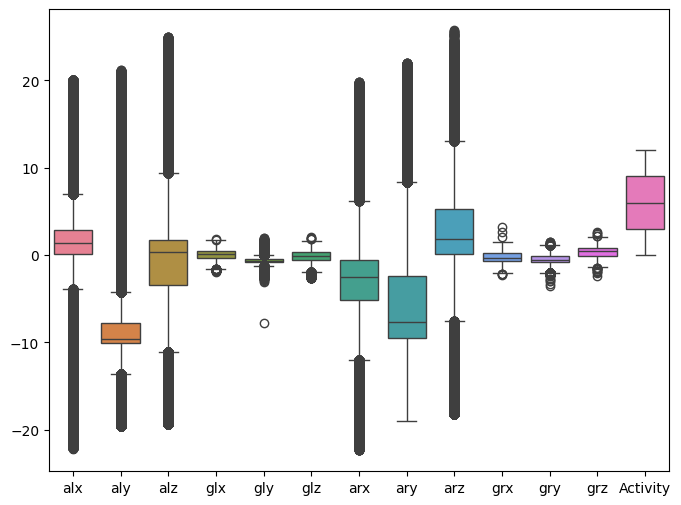

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df1)
plt.show()


#Modeling Data Preparation


In [ ]:
train = df1[(df1['subject'] != 'subject10') & (df1['subject'] != 'subject9')]
test = df1.drop(train.index, axis=0)
train.shape,test.shape

((299093, 14), (73642, 14))

In [ ]:
X_train = train.drop(['Activity','subject'],axis=1)
y_train = train['Activity']
X_test = test.drop(['Activity','subject'],axis=1)
y_test = test['Activity']
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((299093, 12), (299093,), (73642, 12), (73642,))

In [ ]:
from scipy import stats
def create_dataset(X, y, time_steps, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        x = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(x)
        ys.append(stats.mode(labels)[0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [ ]:
X_train,y_train = create_dataset(X_train, y_train, 100, step=50)
X_train.shape, y_train.shape

((5980, 100, 12), (5980, 1))

In [ ]:
X_test,y_test = create_dataset(X_test, y_test, 100, step=50)
X_test.shape, y_test.shape

((1471, 100, 12), (1471, 1))

#Model Building


In [ ]:
import tensorflow as tf
from keras import layers
import keras


In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=[100,12]))
model.add(layers.Conv1D(filters=32, kernel_size=3, padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.Conv1D(filters=64, kernel_size=3, padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPool1D(2))
model.add(layers.LSTM(64))
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 100, 32)           1184      
                                                                 
 batch_normalization (Batch  (None, 100, 32)           128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 100, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 64)           6208      
                                                                 
 batch_normalization_1 (Bat  (None, 100, 64)           256       
 chNormalization)                                                
                                                                 
 re_lu_1 (ReLU)              (None, 100, 64)           0

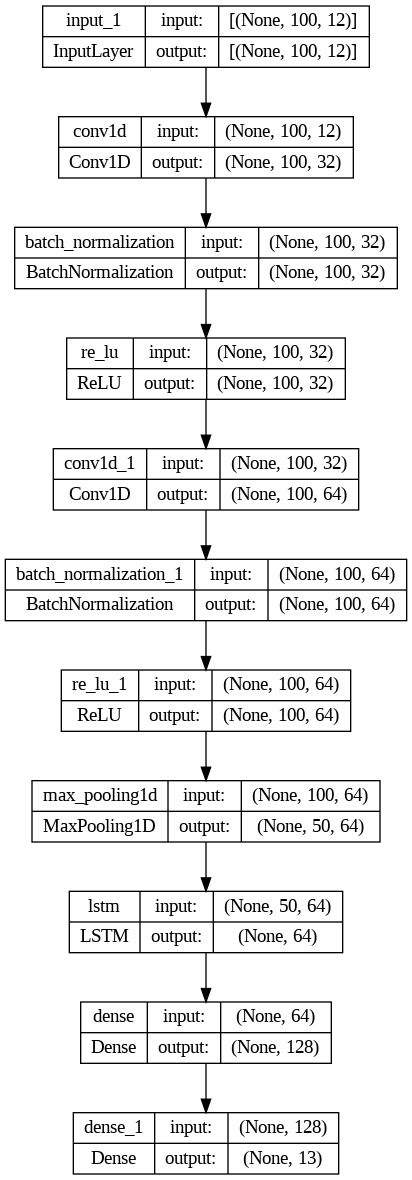

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/mHealth/mhealth_best.h5", save_best_only=True, monitor="val_loss"),
             keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1)]

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"],)

model_history = model.fit(X_train,y_train, epochs= 10, validation_data=(X_test,y_test), callbacks=callbacks)


Epoch 1/10
187/187 [==============================] - ETA: 0s - loss: 0.7190 - sparse_categorical_accuracy: 0.7548

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


187/187 [==============================] - 15s 64ms/step - loss: 0.7190 - sparse_categorical_accuracy: 0.7548 - val_loss: 1.2465 - val_sparse_categorical_accuracy: 0.5459
Epoch 2/10
187/187 [==============================] - 11s 58ms/step - loss: 0.1842 - sparse_categorical_accuracy: 0.9383 - val_loss: 0.0719 - val_sparse_categorical_accuracy: 0.9864
Epoch 3/10
187/187 [==============================] - 9s 47ms/step - loss: 0.1222 - sparse_categorical_accuracy: 0.9612 - val_loss: 0.0509 - val_sparse_categorical_accuracy: 0.9878
Epoch 4/10
187/187 [==============================] - 11s 58ms/step - loss: 0.0637 - sparse_categorical_accuracy: 0.9798 - val_loss: 0.0393 - val_sparse_categorical_accuracy: 0.9912
Epoch 5/10
187/187 [==============================] - 11s 59ms/step - loss: 0.0570 - sparse_categorical_accuracy: 0.9801 - val_loss: 0.0728 - val_sparse_categorical_accuracy: 0.9708
Epoch 6/10
187/187 [==============================] - 8s 43ms/step - loss: 0.0501 - sparse_categorical

#Model Evaluation

In [ ]:
model_history.history


{'loss': [0.7190002799034119,
  0.18424293398857117,
  0.12216241657733917,
  0.0637277215719223,
  0.056982431560754776,
  0.05006455257534981,
  0.07275626063346863,
  0.03759024292230606,
  0.026284659281373024,
  0.021415192633867264],
 'sparse_categorical_accuracy': [0.7548494935035706,
  0.9382942914962769,
  0.9612039923667908,
  0.9797658920288086,
  0.9801003336906433,
  0.9849498271942139,
  0.9780936241149902,
  0.989130437374115,
  0.991304337978363,
  0.9936454892158508],
 'val_loss': [1.2464760541915894,
  0.07186400890350342,
  0.050936564803123474,
  0.03930522873997688,
  0.07279667258262634,
  0.29357483983039856,
  0.04501248896121979,
  0.07640726864337921,
  0.11749894917011261,
  0.17542925477027893],
 'val_sparse_categorical_accuracy': [0.5458871722221375,
  0.9864038228988647,
  0.9877634048461914,
  0.9911624789237976,
  0.9707682132720947,
  0.9517335295677185,
  0.9857239723205566,
  0.9762066602706909,
  0.9483344554901123,
  0.9462950229644775]}

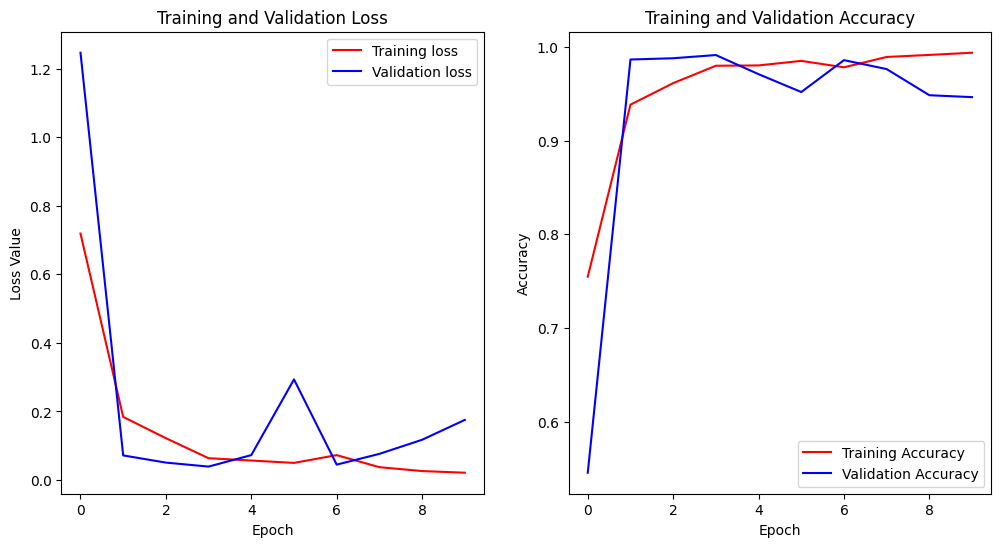

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
train_accuracy = model_history.history['sparse_categorical_accuracy']
val_accuracy = model_history.history['val_sparse_categorical_accuracy']

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(train_loss, 'r', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracy, 'r', label='Training Accuracy')
plt.plot(val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/mHealth/mhealth_best.h5")

train_loss, train_acc = model.evaluate(X_train,y_train)
test_loss, test_acc = model.evaluate(X_test,y_test)

print("Train accuracy", round(train_acc*100, 2),'%')
print("Train loss", train_loss)
print("Test accuracy", round(test_acc*100, 2),'%')
print("Test loss", test_loss)

46/46 [==============================] - 1s 12ms/step - loss: 0.0393 - sparse_categorical_accuracy: 0.9912
Train accuracy 99.05 %
Train loss 0.03350372985005379
Test accuracy 99.12 %
Test loss 0.03930522873997688


In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis = 1)
pred = pred.reshape(-1,1)

46/46 [==============================] - 2s 20ms/step


In [ ]:
pred.shape,y_test.shape

((1471, 1), (1471, 1))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,pred))
print('*'*50)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       0.99      0.98      0.99       123
           2       1.00      0.99      1.00       123
           3       1.00      1.00      1.00       123
           4       0.99      0.99      0.99       123
           5       1.00      0.98      0.99       123
           6       0.95      1.00      0.97       107
           7       1.00      0.99      1.00       112
           8       0.97      0.97      0.97       117
           9       0.99      0.99      0.99       123
          10       0.99      1.00      1.00       122
          11       1.00      1.00      1.00       124
          12       1.00      1.00      1.00        40

    accuracy                           0.99      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.99      0.99      0.99      1471

**************************************************
[[111   0   0   0   0   0   

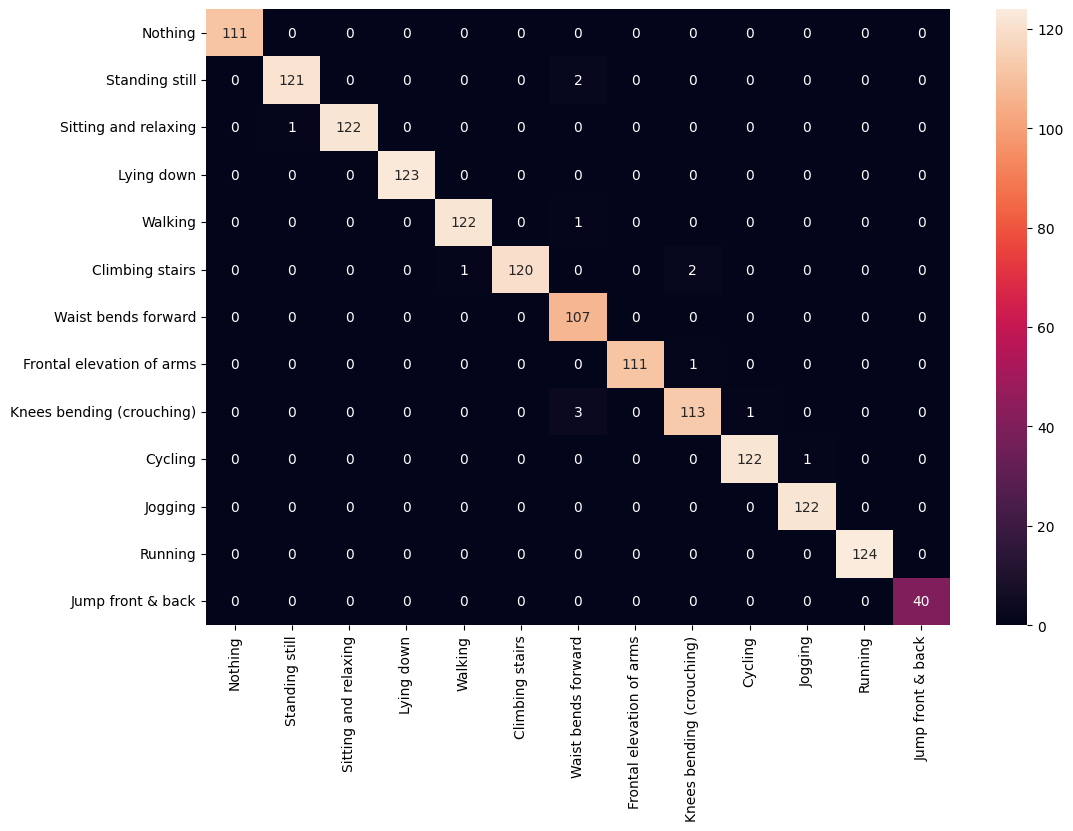

In [ ]:
plt.figure(figsize=(12,8))
conf_matrix = confusion_matrix(y_test,pred)
sns.heatmap(conf_matrix, xticklabels= label_map.values(), yticklabels= label_map.values(), annot=True, fmt="d")
plt.show()